In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/15082020-ServicePublic_QR_20170612_20180612.csv')

In [3]:
df.head()

,Unnamed: 0,incoming_message,unique_question,response,url,question,len_question,url_2,url_3,url_4
0,2822979_0,"Bonjour, J'aimerais savoir qui contacter afin ...",False,"Bonjour, Merci pour votre message. Vous trou...",https://www.service-public.fr/particuliers/vos...,"Bonjour, J'aimerais savoir qui contacter afin ...",29,NaN,NaN,NaN
1,2822979_1,"Bonjour, J'aimerais savoir qui contacter afin ...",False,"Bonjour, Merci pour votre message. Vous trou...",https://www.service-public.fr/particuliers/vos...,Comment s'appelle ce document?,6,NaN,NaN,NaN
2,2822986_0,je viens de céder la voiture qui était au nom ...,True,"Bonjour, Merci pour votre message. Vous trou...",https://www.service-public.fr/particuliers/vos...,je viens de céder la voiture qui était au nom ...,71,NaN,NaN,NaN
3,2822989_0,"Agée de 63 ans, Ne touchant que la pension de ...",False,"Bonjour, Merci pour votre message. Vous trouv...",https://www.service-public.fr/particuliers/vos...,"Agée de 63 ans, Ne touchant que la pension de ...",49,https://www.service-public.fr/particuliers/vos...,NaN,NaN
4,2822989_1,"Agée de 63 ans, Ne touchant que la pension de ...",False,"Bonjour, Merci pour votre message. Vous trouv...",https://www.service-public.fr/particuliers/vos...,Etant aux ASS est ce qu'il peut demander l'exo...,19,https://www.service-public.fr/particuliers/vos...,NaN,NaN


# Dataset with a unique question 

In [4]:
df_u = df[df.unique_question]
df_u.shape

(464, 10)

<AxesSubplot:>

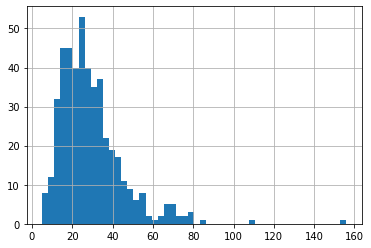

In [5]:
df_u.len_question.hist(bins= 50)

In [6]:
short_df = df_u[~ df_u.url_2.isna()]
short_df.head()

,Unnamed: 0,incoming_message,unique_question,response,url,question,len_question,url_2,url_3,url_4
229,2825380_0,"Bonjour, Etant en pleine démission de mon CDI,...",True,"Bonjour, Merci pour votre message. Vous trou...",https://www.service-public.fr/particuliers/vos...,"Bonjour, Etant en pleine démission de mon CDI,...",38,https://www.service-public.fr/particuliers/vos...,NaN,NaN
453,2831506_0,A quel visa peux pretendre mon conbubin sachan...,True,"Bonjour, Merci pour votre message. Vous trou...",https://www.service-public.fr/particuliers/vos...,A quel visa peux pretendre mon conbubin sachan...,19,https://www.service-public.fr/particuliers/vos...,NaN,NaN
459,2831565_0,combien de faut-il pour un envoi d'actes de na...,True,"Bonjour, Merci pour votre message. La demand...",https://www.service-public.fr/particuliers/vos...,combien de faut-il pour un envoi d'actes de na...,12,https://www.service-public.fr/particuliers/vos...,https://www.service-public.fr/particuliers/vos...,NaN
561,2832443_0,Quelles sont les formulaires ou démarches à ef...,True,"Bonjour, Merci pour votre message. Vous trou...",https://www.service-public.fr/particuliers/vos...,Quelles sont les formulaires ou démarches à ef...,22,https://www.service-public.fr/particuliers/vos...,NaN,NaN
567,2832477_0,Bonjour j'aimerai savoir si le CEPC est valabl...,True,"Bonjour, Merci pour votre message. Vous trou...",https://www.service-public.fr/particuliers/vos...,Bonjour j'aimerai savoir si le CEPC est valabl...,12,https://www.service-public.fr/particuliers/vos...,NaN,NaN


In [7]:
for s in df_u.question:
    print ('-->   ' + s)

-->   je viens de céder la voiture qui était au nom de mon mari décédé il y a qq mois retour de la déclaration car le no d'immatriculation ne correspond pas a mon identité j'ai donne a l'acquéreur le papier du notaire indiquant que je suis propriétaire du véhicule et la déclaration sur l'honneur que la voiture n'a pas roulé depuis le décèsque dois je faire?
-->   bonjour, j'ai acheter un véhicule mais j'ai égarer le certificat de cession je dois faire la carte grise a mon nom et je n'arrive pas a joindre le vendeur comment dois je faire?
-->   Bonjour, j'aimerai vous demander de l'assistance pour cette dissolution, les 7 membres créateurs de l'association on eu des différents et je suis le seul restant de celle qui gère la paperasse, tout les autres membres on rejoint l'on quitter, étant secrétaire et seul je ne peut pas faire d'assemblée, comment dois-je m'y prendre pour dissoudre l'association?
-->   Un fonctionnaire peut-il exercer une activité dans le secteur privé quand il bénéfic

## CONCLUSION
There are 464 messages sent by the users that contain only one question. This training dataset could be used for verifying the performances of the model with a single question only. Sometimes the answer contains more than 1 url containing the answer (124 answers out of 464). 

In [8]:
# This dataset will be saved with the following name : 
df_u.to_csv('15082020-ServicePublic_QR_20170612_20180612_464_single_questions.csv')

# Datasets with some context 
It is very common to get more than one question in the message. Very often, people begin describing the context of their question and then ask one or more questions related to this context. In the current state of the development of piaf, it is not possible to use the context to get a correct answer. Let's explore these datasets :

In [9]:
df = pd.read_csv('../data/15082020-ServicePublic_QR_20170612_20180612.csv')

<AxesSubplot:>

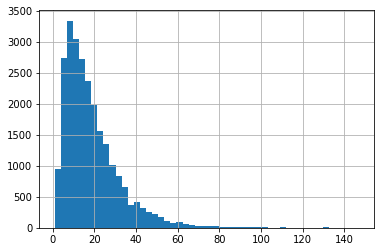

In [10]:
df = df[~ df.unique_question] #we take the questions that are not unique 
df.len_question.hist(bins= 50)

In [11]:
#Let's have a look at the short questions 
for q in df[df.len_question.between(1, 10)].sample(20, random_state=42)['question']:
    print('-->   ' + q)

-->   Une attestation signée de l'employeur est-elle suffisante?
-->   cela affecte ma retraite?
-->   Cela pourrait-il nous rendre éligibles à une bourse?
-->   ?
-->   Dans quel ordre devons nous effectuer les démarches ?
-->   Pourquoi une telle différence?
-->   comment conduire à l'étranger ?
-->   ?
-->   Comment puis-je faire pour le faire apposer?
-->   Je n'ai donc pas droit à cette aide ?
-->   Peut-elle se porter candidate à ce nouveau bien ?
-->   En france?
-->   pouvez vous confirmer ?
-->   Doit je prendre un rdv avec la préfecture ?
-->   Ou puis-je obtenir de plus amples renseignements ?
-->   Si OUI, quel est son coût ?
-->   cela peut-il également fonctionner pour une carte grise ?
-->   Comment faire?
-->   y a t'il prescription?
-->   Qui a raison?


### 20 out of 20 questions lack context and thus are meaningless. 

In [12]:
#Let's have a look at the short questions 
for q in df[df.len_question.between(11, 20)].sample(20, random_state=42)['question']:
    print('-->   ' + q)

-->   Dois-je demander une autorisation quelconque à un organisme, une mairie, une préfecture ?
-->   Nous souhaiterions rentrer en france, cependant comment cela va t il se passer pour le travail?
-->   Quelles sont les formalités pour un mariage avec un étranger ?
-->   Ses à dire sur le premier et le deuxième ou sur un?
-->   Est-ce que nous devons tout de même enregistrer la copropriété sur le registre des copropriétés ?
-->   Comment faire pour déclarer mes impots pour la première fois ?
-->   l'acheteur va t il pouvoir faire faire une carte grise sans ce contrôle technique ?
-->   Aurais je droit à une retraite anticipée, vu mon état de travailleur handicapé à partir de quel âge ?
-->   Où est ce que je peux m'adresser pour avoir un document indiquant son calcul ?
-->   Est-il possible d'avoir 2 passeports afin d'éviter les futures démarches de visa pour les Etats Unis?
-->   Est-ce que ce contrôle technique est valable en France ?
-->   Quelles sont les démarches a effectues pou

### 12 out of 20 questions lack context and thus are meaningless 

In [13]:
#Let's have a look at the longer questions 
for q in df[df.len_question.between(21, 30)].sample(20, random_state=42)['question']:
    print('-->   ' + q)

-->   Bonjour, Est ce que ma declaration de changement de residence (France vers Autriche) est suffisante pour être radiée des services d'impôts en France ?
-->   Est-ce qu'il est absolument nécessaire de faire changer l'adresse de la carte grise si le véhicule ne roule pas ?
-->   Ont-ils le droit de l'empêcher de sortir du collège pour se restaurer à la maison en sa qualité d'externe?
-->   j'ai à ma disposition uniquement un courrier de sa part demandant sa désolidarisation du compte-joint, est-ce suffisant?
-->   Au cours de mes différents déménagements, j'ai perdu tous mes papiers : pouvez-vous me les renvoyer s'il vous plait ?
-->   Pouvez-vous répondre à ma question et m'indiquer le texte de loi ou décret qui traite de ce sujet ?
-->   Je vois que je n'ai pas envoyé de la traduction du permis en anglais, comment l'envoyer maintenant?
-->   Puis-je l'utiliser jusqu'en 2020 du coup meme si je n'étais pas majeur lorsqu'elle a été délivrée?
-->   Est-ce que le survivant peut jouir l

### 13 out of 20 questions lack context and thus are meaningless

In [14]:
#Let's have a look at the longer questions 
for q in df[df.len_question.between(31, 40)].sample(20, random_state=42)['question']:
    print('-->   ' + q)

-->   QUESTION 2 sur les congé sous combien de temps doit il répondre a une demande car des fois il signe mes congés quand je reviens de congés et pour d autre il refuse 8 jour avt la date?
-->   Pouvez-vous me dire si cela ouvre des droits à déduction ou crédit d'impôt au prorata des charges qui me sont facturées par le syndic de copropriété bien entendu?
-->   Une attestation de votre représentation suisse dans le pays de délivrance de votre permis peut vous être réclamée En effet est il nécessaire étant Suisse de démontrer qu'elle résidait en Suisse avant son obtention du permis suisse ?
-->   Où puis-je me renseigner pour avoir une idée du montant de la taxe d'habitation que nous devrons payer , et puis je d'ores et déjà demander une mensualisation pour le règlement de cette taxe svp ?
-->   Je souhaiterais don savoir si votre seuil de 19461.36 est un seuil à parti duquel le montant de l'allocation diminue ou le seuil à partir duquel la personne ne preçoit mon l allocation ?
-->   

###  9 out of 20 questions lack context and thus are meaningless

In [15]:
#Let's have a look at the longer questions 
for q in df[df.len_question.between(41, 50)].sample(20, random_state=42)['question']:
    print('-->   ' + q)

-->   Je suppose donc que je ne suis pas concerné par l’envoi, avec mon dossier, des documents cités au paragraphe III du CERFA 51465#01  mais dois-je cependant répondre à la dernière question du CERFA 108*60 concernant la PMI ?
-->   Bonjour, Ayant des difficultés à trouver une réponse à ma question sur votre site internet, pouvez-vous me confirmer qu'il n'est pas nécessaire de détenir un permis de conduire international pour circuler en Californie lors d'un prochain cours séjour de vacances ?
-->   Bonjour j'ai déposé un permis de construire, il y a plus de 2 mois et je n'ai toujours pas de réponse ,pouvez vous me dire si mon dossier a bien été traité et me fournir le document ?
-->   j'ai mon véhicule diesel en panne de 2002 et j'ai entendu parler de la prime à la casse 2018 pouvez vous m'en dire un peu plus car j'hésite du coup à acquérir un véhicule ce mois ci si je peux bénéficier de cette prime?
-->   Bonjour, Mon divorce va se terminer le 30 septembre ce qui va entrainer une dé

### 5 out of 20 questions lack context and thus are meaningless  

## CONCLUSION
When there is not a unique question, we should select questions that are at least 30 words long. 


In [16]:
# Select questions between 30 and 50 words
df = df[df.len_question.between(31, 50)]
#add the dataset with unique questions
df = pd.concat([df, df_u])
df.shape

(3537, 10)

In [17]:
df.to_csv('15082020-ServicePublic_QR_20170612_20180612_3815_questions.csv')

# Further developments 
## reduce the amount of knowledge base on the context
It could be interesting to evaluate the gain in performance when using the context given by the user. We could see two use case for this :

    1. The user manually refine the context by selecting one or more categories related to his question. 
    2. The user explain the context in plain French and the software select the categories for him. 
    
It would be interesting to evalute the gain of performance of point 1. If the gain is significantly higher, it could be interesting to develop point 2. This could be an algorithm trained based the context given in the 25k Q&A given by Service Public. 

## Improve FAQ of service public 
At the reading of this document, some questions appear to be frequently asked : regarding the carte grise, the attestation de domicile when travelling abroad for a long time ...Other recurring themes may be found with the help of machine learning and the pages associated with the answers could be improved to better adress these specific points. 